In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Import arrest data
arrest_df = pd.read_csv(r"C:\Users\barrb\Downloads\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f (1).csv")

In [3]:
#Reduce columns to only necessary ones
arrest_columns = ['AGE', 'GENDER', 'RACE','OFFENSES', 'ARRESTTIME','INCIDENTZONE','INCIDENTNEIGHBORHOOD','X', 'Y']

In [4]:
#Create new dataframe to reference new columns
arrest_pitt_df = arrest_df[arrest_columns]

In [82]:
#Change DATE to datetime in order to make a line graph of arrests by year
arrest_pitt_df = arrest_pitt_df.rename(columns={
    'ARRESTTIME': 'DATE',})

In [83]:
arrest_pitt_df['DATE'] = pd.to_datetime(arrest_pitt_df['DATE'])

In [84]:
arrest_pitt_df['YEAR'] = [x.year for x in arrest_pitt_df['DATE']]

In [85]:
arrest_pitt_by_year = arrest_pitt_df.loc[(arrest_pitt_df['YEAR'] >= 2017) & (arrest_pitt_df['YEAR'] <= 2023)].\
                    groupby(['YEAR']).\
                    aggregate(Offenses = ('OFFENSES','count')).\
                    reset_index().\
                    set_index('YEAR').\
                    copy()

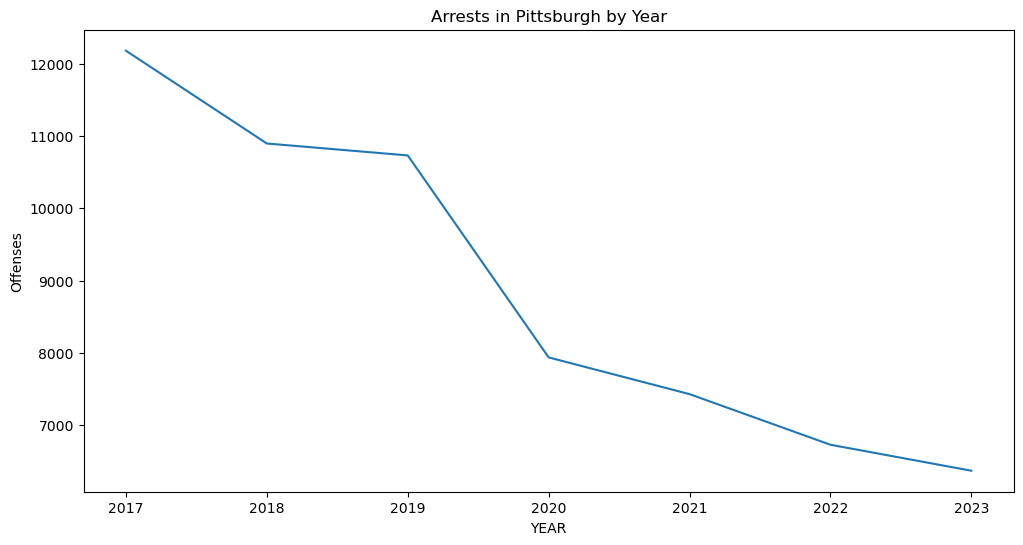

In [86]:
plt.figure(figsize=(12,6))
sns.lineplot(data=arrest_pitt_by_year, x="YEAR", y="Offenses")
plt.title('Arrests in Pittsburgh by Year')
plt.show()

In [87]:
#Plot a bar graph of the total numbers of arrests by zone
arrests_by_zone = arrest_pitt_df.groupby(['INCIDENTZONE']).\
aggregate(arrest_count_zone = ('OFFENSES', 'count')).\
reset_index()

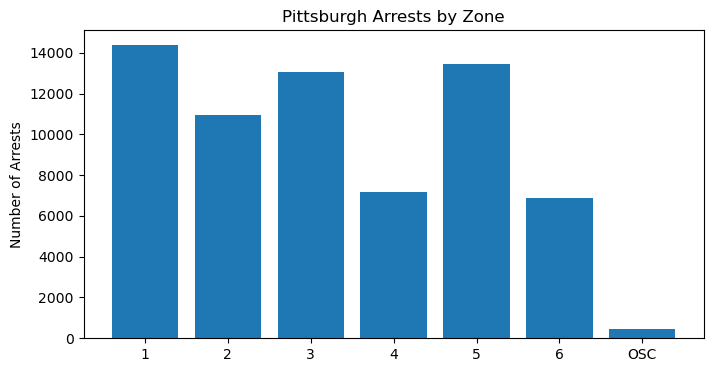

In [88]:
plt.figure(figsize=(8,4))
plt.bar(arrests_by_zone['INCIDENTZONE'],
        arrests_by_zone['arrest_count_zone'],
        0.8)
plt.title('Pittsburgh Arrests by Zone')
plt.ylabel('Number of Arrests')
plt.show()

In [68]:
#Create a condition to filter out only certain type of offense to create new DF
theft_df = arrest_pitt_df['OFFENSES'].str.contains("Theft|Robbery", na=False)

In [31]:
#Create bar graph on theft by Zone
theft_count_zone = arrest_pitt_df[theft_df].groupby(['INCIDENTZONE']).\
aggregate(theft_count = ('OFFENSES', 'count')).\
reset_index()

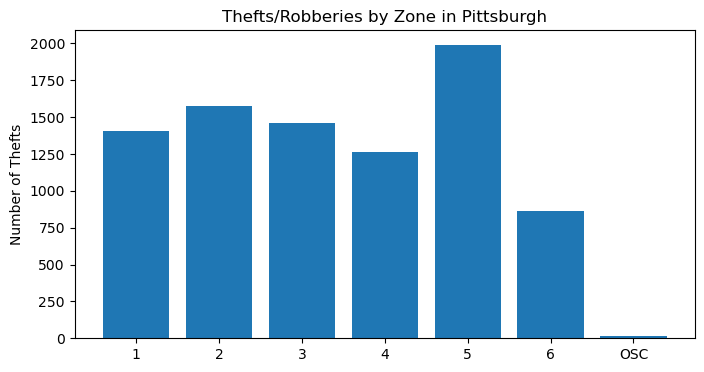

In [53]:
plt.figure(figsize=(8,4))
plt.bar(theft_count_zone['INCIDENTZONE'],
        theft_count_zone['theft_count'],
        0.8)
plt.title('Thefts/Robberies by Zone in Pittsburgh')
plt.ylabel('Number of Thefts')
plt.show()

In [69]:
#Create a condition to filter out only certain type of offense to create new DF
assualt_df = arrest_pitt_df['OFFENSES'].str.contains("Assault", na=False)

In [34]:
#Create bar graph on assault by Zone
assault_count_zone = arrest_pitt_df[assualt_df].groupby(['INCIDENTZONE']).\
aggregate(assault_count = ('OFFENSES', 'count')).\
reset_index()

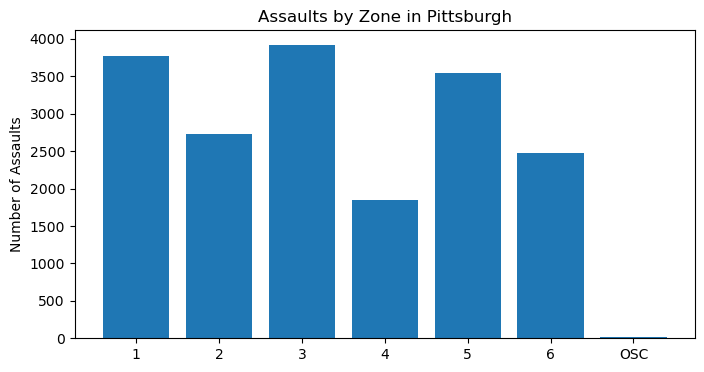

In [52]:
plt.figure(figsize=(8,4))
plt.bar(assault_count_zone['INCIDENTZONE'],
        assault_count_zone['assault_count'],
        0.8)
plt.title('Assaults by Zone in Pittsburgh')
plt.ylabel('Number of Assaults')
plt.show()

In [70]:
#Create a condition to filter out only certain type of offense to create new DF
possession_df = arrest_pitt_df['OFFENSES'].str.contains("Possession", na=False)

In [38]:
#Create bar graph on possession by Zone
possession_count_zone = arrest_pitt_df[possession_df].groupby(['INCIDENTZONE']).\
aggregate(possession_count = ('OFFENSES', 'count')).\
reset_index()

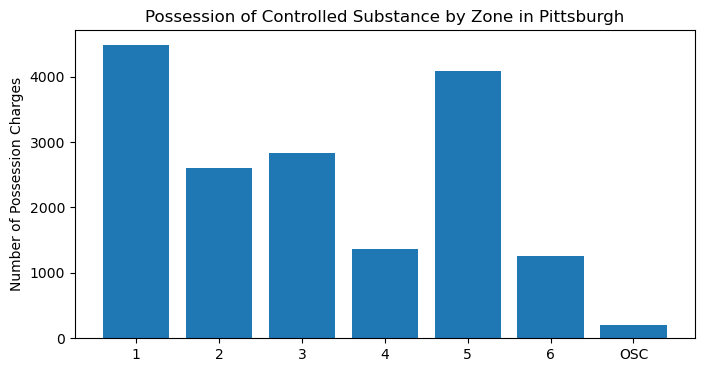

In [61]:
plt.figure(figsize=(8,4))
plt.bar(possession_count_zone['INCIDENTZONE'],
        possession_count_zone['possession_count'],
        0.8)
plt.title('Possession of Controlled Substance by Zone in Pittsburgh')
plt.ylabel('Number of Possession Charges')
plt.show()

In [71]:
#Create a condition to filter out only certain type of offense to create new DF
disorderly_df = arrest_pitt_df['OFFENSES'].str.contains("Disorderly Conduct", na=False)

In [40]:
#Create bar graph on Disorderly Conduct by Zone
disorderly_count_zone = arrest_pitt_df[disorderly_df].groupby(['INCIDENTZONE']).\
aggregate(disorderly_count = ('OFFENSES', 'count')).\
reset_index()

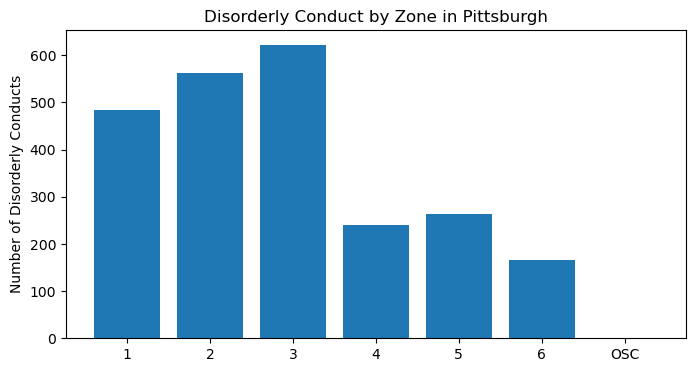

In [50]:
plt.figure(figsize=(8,4))
plt.bar(disorderly_count_zone['INCIDENTZONE'],
        disorderly_count_zone['disorderly_count'],
        0.8)
plt.title('Disorderly Conduct by Zone in Pittsburgh')
plt.ylabel('Number of Disorderly Conducts')
plt.show()

In [72]:
DUI_df = arrest_pitt_df['OFFENSES'].str.contains("DUI", na=False)

In [55]:
#Create bar graph on DUIs by Zone
DUI_count_zone = arrest_pitt_df[DUI_df].groupby(['INCIDENTZONE']).\
aggregate(DUI_count = ('OFFENSES', 'count')).\
reset_index()

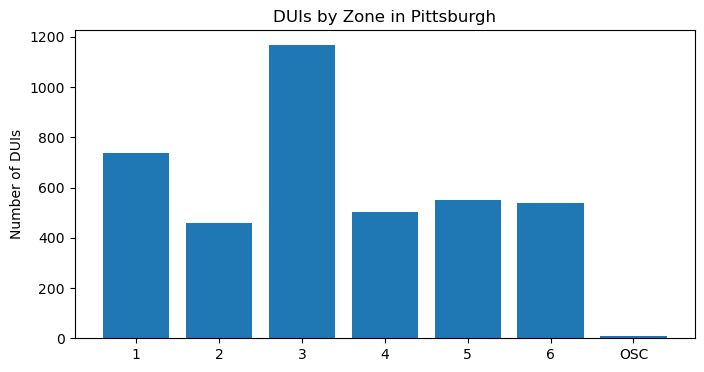

In [54]:
plt.figure(figsize=(8,4))
plt.bar(DUI_count_zone['INCIDENTZONE'],
        DUI_count_zone['DUI_count'],
        0.8)
plt.title('DUIs by Zone in Pittsburgh')
plt.ylabel('Number of DUIs')
plt.show()

In [73]:
property_df = arrest_pitt_df['OFFENSES'].str.contains("Property", na=False)

In [57]:
#Create bar graph on Property Crime by Zone
property_count_zone = arrest_pitt_df[property_df].groupby(['INCIDENTZONE']).\
aggregate(property_count = ('OFFENSES', 'count')).\
reset_index()

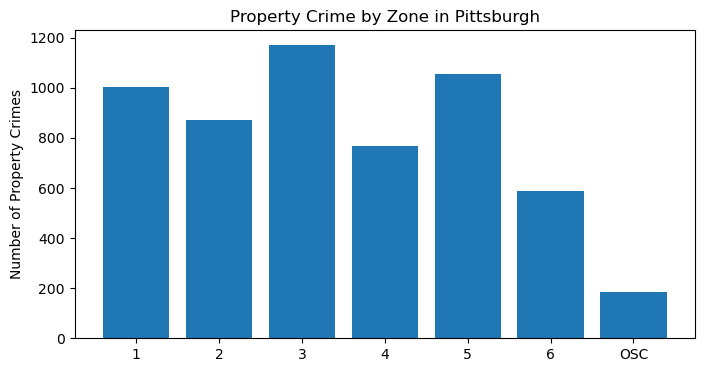

In [60]:
plt.figure(figsize=(8,4))
plt.bar(property_count_zone['INCIDENTZONE'],
        property_count_zone['property_count'],
        0.8)
plt.title('Property Crime by Zone in Pittsburgh')
plt.ylabel('Number of Property Crimes')
plt.show()

In [74]:
weapon_df = arrest_pitt_df['OFFENSES'].str.contains("Robbery", na=False)

In [62]:
#Create bar graph on Weapons Violation by Zone
weapon_count_zone = arrest_pitt_df[weapon_df].groupby(['INCIDENTZONE']).\
aggregate(weapon_count = ('OFFENSES', 'count')).\
reset_index()

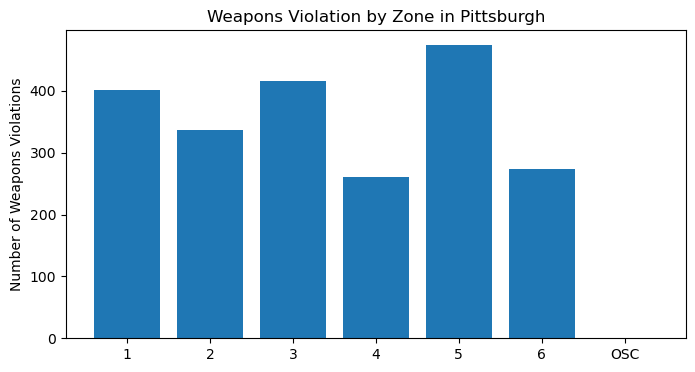

In [63]:
plt.figure(figsize=(8,4))
plt.bar(weapon_count_zone['INCIDENTZONE'],
        weapon_count_zone['weapon_count'],
        0.8)
plt.title('Weapons Violation by Zone in Pittsburgh')
plt.ylabel('Number of Weapons Violations')
plt.show()

In [64]:
#Create a pie chart on portion of each type of arrests

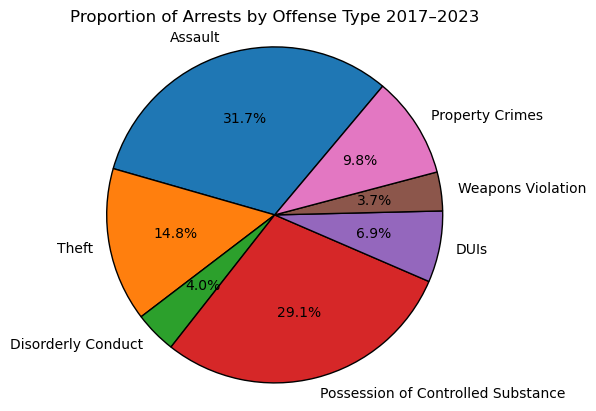

In [80]:
labels = ['Assault', 'Theft', 'Disorderly Conduct', 'Possession of Controlled Substance', 'DUIs', 'Weapons Violation', 'Property Crimes']
sizes = [18339, 8581, 2340, 16856, 3975, 2165, 5660]

# Create the pie chart
fig, ax = plt.subplots()
plt.title("Proportion of Arrests by Offense Type 2017–2023")
ax.pie(sizes, labels=labels, wedgeprops={'edgecolor': 'black'}, startangle=50, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [67]:
#Create of line graph on each type of offense over time (2017-2023)